In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [7]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Manhattan          1
Hagerstown         1
Margate            1
Champaign          1
Danbury            1
Name: City, Length: 531, dtype: int64

In [8]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
#Filtration of Sub-categories according to there Category

Category={}
for i in df['Category'].unique():
    Category[i]=list(df['Sub-Category'][df['Category']==i].unique())
    
Category

{'Furniture': ['Bookcases', 'Chairs', 'Tables', 'Furnishings'],
 'Office Supplies': ['Labels',
  'Storage',
  'Art',
  'Binders',
  'Appliances',
  'Paper',
  'Envelopes',
  'Fasteners',
  'Supplies'],
 'Technology': ['Phones', 'Accessories', 'Machines', 'Copiers']}

In [10]:
Region_sale={}
for i in df['Region'].unique():
    sale=df['Sales'][df['Region']==i].sum()
    Region_sale[i]=sale

Region_sale

{'South': 391721.905,
 'West': 725457.8245,
 'Central': 501239.8908,
 'East': 678781.24}

In [11]:
Region_profit={}
for i in df['Region'].unique():
    profit=df['Profit'][df['Region']==i].sum()
    Region_profit[i]=profit
    
Region_profit

{'South': 46749.4303,
 'West': 108418.4489,
 'Central': 39706.3625,
 'East': 91522.78}

In [12]:
#Categories according to their mean sales, Quantity, Discounts and profit
df.groupby(['Category']).mean()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,55726.556341,349.834887,3.785007,0.173923,8.699327
Office Supplies,54890.951211,119.324101,3.801195,0.157285,20.327050
Technology,55551.572279,452.709276,3.756903,0.132323,78.752002


By above data i can conclude that the Furniture Sales are moderate but it generates very less profit as compare to Office Supplies and Technology.

Whereas Technology sales are high and its generates maximum profit as well. So as per given data if i am a manager i will minimise the discount to be given to customers to increase the profit of Furniture sales which is a weak area for profit.

In [13]:
#Function to extact the mean profit of all sub-categories

dic={}
less=[]
for i in df['Sub-Category'].unique():
    mean=df['Profit'][df['Sub-Category']==i].mean()
    dic[i]=mean
    if mean<0:
        less.append(i)

In [14]:
#Sub-categories according to their mean profit
dic

{'Bookcases': -15.230508771929824,
 'Chairs': 43.09589351701783,
 'Labels': 15.236961538461538,
 'Tables': -55.565771473354225,
 'Storage': 25.152277068557922,
 'Furnishings': 13.645918077324973,
 'Art': 8.20073743718593,
 'Phones': 50.07393768278965,
 'Binders': 19.84357406434668,
 'Appliances': 38.922758369098716,
 'Paper': 24.8566199270073,
 'Accessories': 54.111788,
 'Envelopes': 27.41801850393701,
 'Fasteners': 4.375659907834101,
 'Supplies': -6.258418421052631,
 'Machines': 29.43266869565218,
 'Copiers': 817.9091897058825}

In [15]:
#These are the products who're making negative profit 
less

['Bookcases', 'Tables', 'Supplies']

These are the products who're making negative profit and these product should be presented with well planned strategy for making profit in market

In [16]:
dic_keys=[]
dic_values=[]
for i,j in dic.items():
    dic_keys.append(i)
    dic_values.append(j)

<BarContainer object of 17 artists>

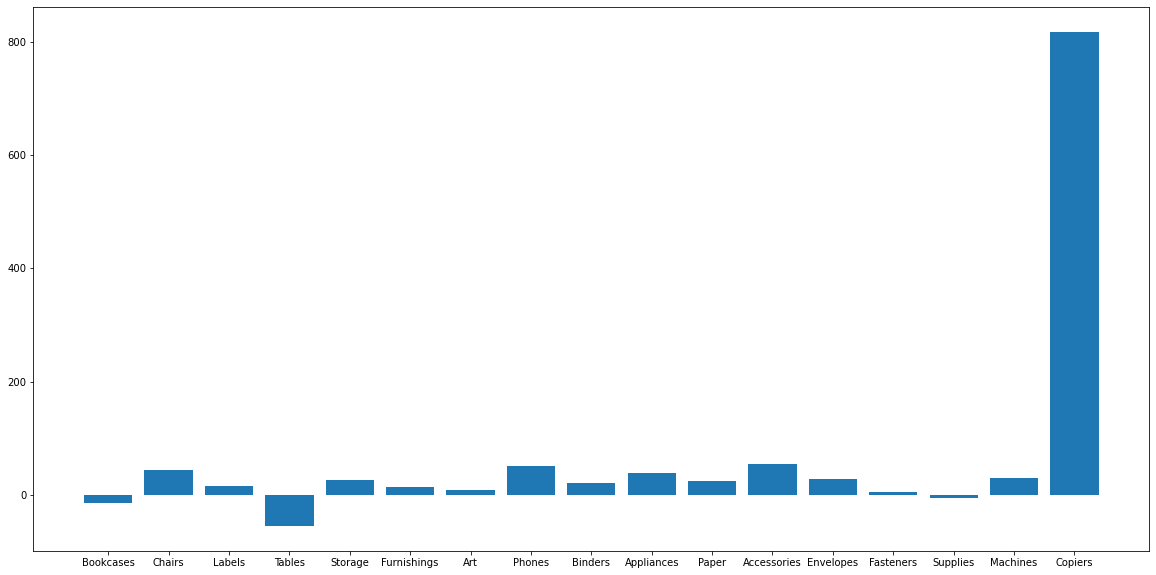

In [17]:
plt.figure(figsize=(20,10))
plt.bar(dic_keys,height=dic_values)
